# Preliminary Project Notebook: Inside the Scooby-Doo Verse

A data analysis project by UCLA Digital Humanities student Varsha Hunter for DH 140.

## Introduction

This project aims to explore the Scooby-Doo universe and answer some controversial questions about the Gang and their adventures capturing monsters and villains. 

### Research Question:

#### Who is the strongest link and the weakest link among the Gang? 

The Scooby-Doo Gang consists of five total members: Fred, Velma, Daphne, Shaggy, and Scooby-Doo. Fans of Scooby-Doo have their favorites for numerous reasons, however many may argue who is the strongest link and who is the weakest link among the gang. Is Velma the strongest because she is the smartest? Or is she the weakest because of her bad eyesight? Or is Fred the strongest due to his leadership qualities? Or is he the weakest because he brings nothing else to the table? This project may bring about controversy because the answer may not be what we expect due to personal opinions. However, we aim to answer this question using different metrics such as: the number of times each character has been captured by a villain, the number of snacks they consume in an episode, the number of villains they've captured themselves, etc. Hopefully after our extensive analysis, we're able to come to a decisive conclusion.

### Project Scope

The goal of our project is to answer our research question through several visualizations and statistical analysis. One way we can answer this question is to calculate the frequency of villains each gang member was able to capture throughout time and the frequency of abductions for each gang member. We can visualize these results through a pie chart or bar chart for visual context. As we look further into our data, we hope to create 3-5 visualizations that aid in our answering our research question.     

Here are some other questions we can ask & look into as we explore our data: 
- Which villain in the Scooby-Doo universe is the most formidable?
- Is Scooby Snack consumption actually correlated with an improvement in villain captures? Do Scooby Snacks actually help capture villains? 
- What are the top main motives behind the crimes of villains within the Scooby Verse? 
- Do male or female individuals make better villains? 
- Can we predict which scooby doo monsters are real or not given the other existing variables within the dataset?

## Looking at the Data  

The dataset was originally created by plummye and shared on Kaggle. However, I found the dataset in the form of a csv on Data.World. The dataset includes several variables about the characters, villains, ratings, and more for every episode and movie to exist in the Scooby-Doo universe.

Here are some summary statistics on the data: 

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
# Loading the Data
scooby_df = pd.read_csv('scoobydoo.csv')

In [89]:
# Preview of the Data
scooby_df.head(5)

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


In [35]:
# Summary Statistics 
scooby_df.describe()

,index,imdb,engagement,run_time,monster_amount,suspects_amount,culprit_amount,split_up,another_mystery,set_a_trap,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo
count,603.000000,588.000000,588.000000,603.000000,603.000000,603.000000,603.000000,384.000000,384.000000,384.000000,438.000000,385.000000,385.000000,385.000000,571.000000,571.000000,571.000000,575.000000
mean,302.000000,7.277891,580.329932,23.520730,1.749585,2.850746,1.039801,0.335938,0.177083,0.122396,0.563927,1.306494,0.116883,0.051948,2.152364,0.059545,0.133100,0.718261
std,174.215384,0.732493,4807.924225,17.207571,2.289361,2.616891,1.066747,0.549541,0.414988,0.336032,1.304551,1.916101,0.337501,0.222211,2.731796,0.621226,0.422782,0.794535
min,1.000000,4.200000,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,6.900000,27.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,302.000000,7.300000,54.500000,22.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,452.500000,7.700000,128.250000,23.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000
max,603.000000,9.600000,100951.000000,94.000000,19.000000,20.000000,11.000000,2.000000,3.000000,2.000000,10.000000,13.000000,2.000000,1.000000,26.000000,14.000000,4.000000,7.000000


In [54]:
# Fred 
fred_caught = scooby_df['caught_fred'].sum()
fred_captured = scooby_df['captured_fred'].sum()
fred_snacks = scooby_df['snack_fred'].sum()
print('Number of Times Fred Has Been Captured:', fred_captured)
print('Number of Times Fred Has Caught a Monster:', fred_caught)
print('Number of Scooby Snacks Fred Has Eaten:', fred_snacks)

Number of Times Fred Has Been Captured: 71
Number of Times Fred Has Caught a Monster: 132
Number of Scooby Snacks Fred Has Eaten: 18


In [53]:
# Daphne
daphne_caught = scooby_df['caught_daphnie'].sum()
daphne_captured = scooby_df['captured_daphnie'].sum()
daphne_snacks = scooby_df['snack_daphnie'].sum()
print('Number of Times Daphne Has Been Captured:', daphne_captured)
print('Number of Times Daphne Has Caught a Monster:', daphne_caught)
print('Number of Scooby Snacks Daphne Has Eaten:', daphne_snacks)

Number of Times Daphne Has Been Captured: 91
Number of Times Daphne Has Caught a Monster: 29
Number of Scooby Snacks Daphne Has Eaten: 49


In [51]:
# Velma
velma_caught = scooby_df['caught_velma'].sum()
velma_captured = scooby_df['captured_velma'].sum()
velma_snacks = scooby_df['snack_velma'].sum()
print('Number of Times Velma Has Been Captured:', velma_captured)
print('Number of Times Velma Has Been Caught a Monster:', velma_caught)
print('Number of Scooby Snacks Velma Has Eaten:', velma_snacks)

Number of Times Velma Has Been Captured: 74
Number of Times Velma Has Been Caught a Monster: 41
Number of Scooby Snacks Velma Has Eaten: 29


In [49]:
# Shaggy 
shaggy_caught = scooby_df['caught_shaggy'].sum()
shaggy_captured = scooby_df['captured_shaggy'].sum()
shaggy_snacks = scooby_df['snack_shaggy'].sum()
print('Number of Times Shaggy Has Been Captured:', shaggy_captured)
print('Number of Times Shaggy Has Been Caught a Monster', shaggy_caught)
print('Number of Scooby Snacks Shaggy Has Eaten:', shaggy_snacks)

Number of Times Shaggy Has Been Captured: 85
Number of Times Shaggy Has Been Caught a Monster 77
Number of Scooby Snacks Shaggy Has Eaten: 43


In [48]:
# Scooby 
scooby_caught = scooby_df['caught_scooby'].sum()
scooby_captured = scooby_df['captured_scooby'].sum()
scooby_snacks = scooby_df['snack_scooby'].sum()
print('Number of Times Scooby Has Been Captured:', scooby_captured)
print('Number of Times Scooby Has Been Caught a Monster:', scooby_caught)
print('Number of Scooby Snacks Scooby Has Eaten:', scooby_snacks)

Number of Times Scooby Has Been Captured: 83
Number of Times Scooby Has Been Caught a Monster: 160
Number of Scooby Snacks Scooby Has Eaten: 12


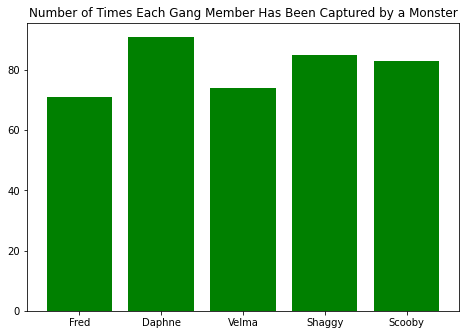

In [45]:
# Exploratory Data Visualization #1: Number of Times Each Gang Member Has Been Captured by a Monster

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
the_gang = ['Fred', 'Daphne', 'Velma', 'Shaggy', 'Scooby']
captures = [fred_captured, daphne_captured, velma_captured, shaggy_captured, scooby_captured]
ax.bar(the_gang, captures, color = 'green')
plt.title('Number of Times Each Gang Member Has Been Captured by a Monster')
plt.show()

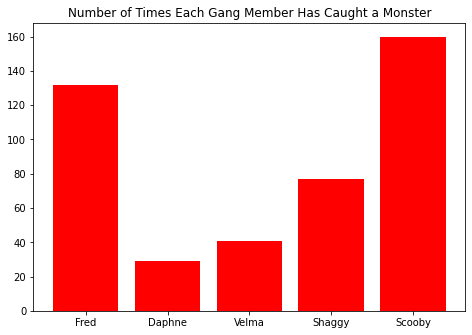

In [46]:
# Exploratory Data Visualization #2: Number of Times Each Gang Member Has Caught a Monster

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
the_gang = ['Fred', 'Daphne', 'Velma', 'Shaggy', 'Scooby']
catches = [fred_caught, daphne_caught, velma_caught, shaggy_caught, scooby_caught]
ax.bar(the_gang, catches, color = 'red')
plt.title('Number of Times Each Gang Member Has Caught a Monster')
plt.show()

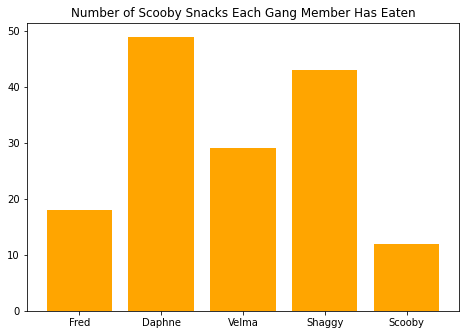

In [56]:
# Exploratory Data Visualization #3: Number of Scooby Snacks Each Gang Member Has Eaten 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
the_gang = ['Fred', 'Daphne', 'Velma', 'Shaggy', 'Scooby']
scooby_snacking = [fred_snacks, daphne_snacks, velma_snacks, shaggy_snacks, scooby_snacks]
ax.bar(the_gang, scooby_snacking, color = 'orange')
plt.title('Number of Scooby Snacks Each Gang Member Has Eaten')
plt.show()

In [66]:
# Motives of Each Monster in Scooby Doo 
motives_list = scooby_df['motive'].to_list()

frequency = {}
for word in motives_list:
    count = frequency.get(word, 0)
    frequency[word] = count + 1 

In [74]:
motives = list(frequency.keys())
motive_count = list(frequency.values())

Text(0.5, 1.0, 'Most Common Motives of Each Monster in Scooby Doo')

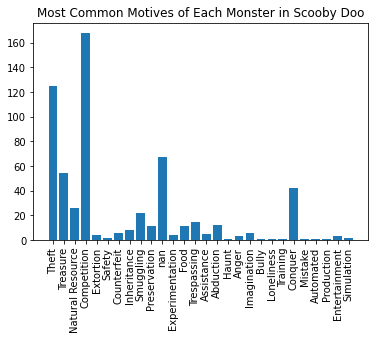

In [88]:
plt.bar(range(len(frequency)), motive_count, tick_label = motives)
plt.xticks(rotation = 90)
plt.title('Most Common Motives of Each Monster in Scooby Doo')

## Data Visualizations

#### Does Eating Scooby Snacks Improve Each Gang Members' Ability to Capture Monsters?

In [104]:
# Fred 
fred_df = scooby_df[scooby_df['snack_fred'] == True]
fred_cap = fred_df['captured_fred'].sum()
fred_cau = fred_df['caught_fred'].sum()


print('Number of Times Fred Has Been Captured:', fred_cap)
print('Number of Times Fred Has Caught a Monster:', fred_cau)


Number of Times Fred Has Been Captured: 3
Number of Times Fred Has Caught a Monster: 5


In [110]:
# Daphne 

daphne_df = scooby_df[scooby_df['snack_daphnie'] == True]
daphne_cap = daphne_df['captured_daphnie'].sum()
daphne_cau = daphne_df['caught_daphnie'].sum()

print('Number of Times Daphne Has Been Captured:', daphne_cap)
print('Number of Times Daphne Has Caught a Monster:', daphne_cau)

Number of Times Daphne Has Been Captured: 8
Number of Times Daphne Has Caught a Monster: 2


In [111]:
# Velma 

velma_df = scooby_df[scooby_df['snack_velma'] == True]
velma_cap = velma_df['captured_velma'].sum()
velma_cau = velma_df['caught_velma'].sum()

print('Number of Times Velma Has Been Captured:', velma_cap)
print('Number of Times Velma Has Caught a Monster:', velma_cau)

Number of Times Velma Has Been Captured: 11
Number of Times Velma Has Caught a Monster: 3


In [112]:
# Shaggy

shaggy_df = scooby_df[scooby_df['snack_shaggy'] == True]
shaggy_cap = shaggy_df['captured_shaggy'].sum()
shaggy_cau = shaggy_df['caught_shaggy'].sum()

print('Number of Times Shaggy Has Been Captured:', shaggy_cap)
print('Number of Times Shaggy Has Caught a Monster:', shaggy_cau)

Number of Times Shaggy Has Been Captured: 9
Number of Times Shaggy Has Caught a Monster: 4


In [113]:
# Scooby

scooby_df = scooby_df[scooby_df['snack_scooby'] == True]
scooby_cap = scooby_df['captured_shaggy'].sum()
scooby_cau = scooby_df['caught_shaggy'].sum()

print('Number of Times Scooby Has Been Captured:', scooby_cap)
print('Number of Times Scooby Has Caught a Monster:', scooby_cau)

Number of Times Scooby Has Been Captured: 4
Number of Times Scooby Has Caught a Monster: 2


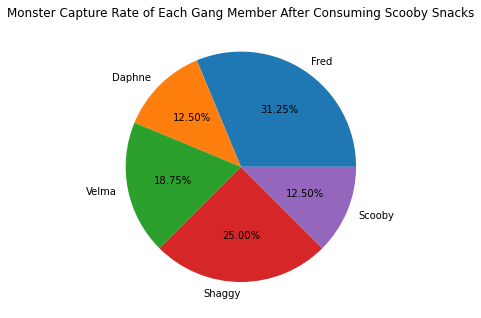

In [115]:
# Data Viz #1: Percentage of Times Each Gang Member Has Caught a Monster After Eating a Scooby Snack in That Episode

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
the_gang = ['Fred', 'Daphne', 'Velma', 'Shaggy', 'Scooby']
snack_catches = [fred_cau, daphne_cau, velma_cau, shaggy_cau, scooby_cau]
ax.pie(snack_catches, labels = the_gang, autopct='%1.2f%%')
plt.title('Monster Capture Rate of Each Gang Member After Consuming Scooby Snacks')
plt.show()

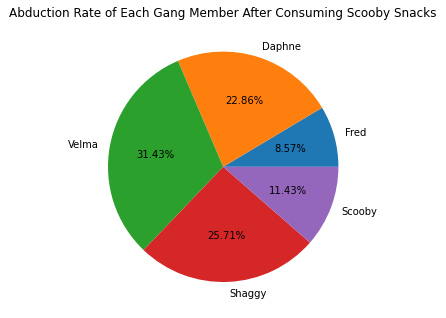

In [118]:
# Data Viz #2: Percentage of Times Each Gang Member Has Gotten Caught After Eating Scooby Snacks

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
the_gang = ['Fred', 'Daphne', 'Velma', 'Shaggy', 'Scooby']
snack_cap = [fred_cap, daphne_cap, velma_cap, shaggy_cap, scooby_cap]
ax.pie(snack_cap, labels = the_gang, autopct='%1.2f%%')
plt.title('Abduction Rate of Each Gang Member After Consuming Scooby Snacks')
plt.show()

Ideas for Other Data Visualizations:
- Line plot of Scooby Snack Consumption vs. Monster Captures to see if Scooby Snack consumption improves Monster Capturing performance
- Line plot of Scooby Snack Consumption vs. Monster Abductions to see if Scooby Snack consumption actually negatively affects performance